<a href="https://colab.research.google.com/github/CAPost0110/Credit_Card_Fraud_Project-03_23-/blob/main/Portfolio_Project_Credit_Card_Fraud_bk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Class" project using credit card (fraud) data.

3/10 - start cleaning and EDA

3/13 - check in with class
  - use lazyclassifier to see which method is best
  - create df to compare performance of tried models
  -create separate notebooks for each "experiment"

try
- Classification model comparison(KNN, Decision tree, logistic regression)
- ANN

check for outliers (winsorization), duplicates, null values

balance - standardize - PCA - outliers

In [1]:
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 KB 12.9 MB/s eta 0:00:00


## Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
# importing voting classifier
from sklearn.ensemble import VotingClassifier, VotingRegressor

import seaborn as sns
import matplotlib.pyplot as plt
import dabl 

from sklearn.preprocessing import LabelEncoder

## Data Exploration 

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Data Science Data/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### From here we can see that:
- there are 284807 rows/observations 
- 31 columns/features
- column names are 'time', 'V1'-'V28' (as this is credit card information, there is no specific detail given for these variables ), 'amount', 'Class'
- the first 30 features are float type (continuous)
- the last feature is int type (categorical)
- there are no null values
  - still need to check for duplicates

In [5]:
data.duplicated().sum()

1081

There are 1081 duplicate rows. We need to remove them from the data.

In [6]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(283726, 31)

In [11]:
confirmation = 284807-1081
if confirmation == data.shape[0]:
  print('duplicates successfully dropped')
#print(f'the new number of records: {data.shape[0]}, should match original number minus duplicates: {confirmation}')

duplicates successfully dropped


We will not use the 'Time' or 'Amount variable for our model(s), so we can drop them.

In [12]:
data.drop(columns=['Time','Amount'], inplace=True)


In [13]:
df= pd.DataFrame(data)

## Descriptive Statistics

- It looks like some type of scaling has already been applied on the first 28 variables.
- Comparing means to maxs it looks like there is a need to address outliers
  - use winsorization

In [11]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.001667
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,0.040796
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000


We have an issue of imbalanced data! 

Our y is Class: 0 = normal, 1 = fraud.  However we have 283,253 normal cases and only 472 fraud cases.
We will try oversampling with 'Smote' to address this issue.

https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

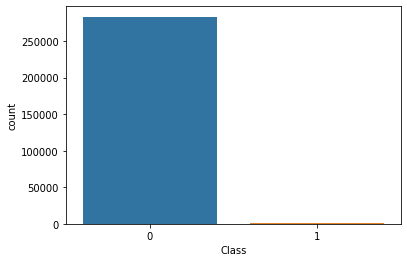

In [12]:
sns.countplot(df['Class'])

In [13]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [14]:
#Installing imblearn
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 8.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [14]:
# split data
X = df.loc[:, df.columns != 'Class']
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
# describes info about train and test set
print(f'Number transactions X_train dataset: {X_train.shape[0]},Number transactions y_train dataset:　{ｙ_train.shape[0]}\nNumber transactions X_test dataset: {X_test.shape[0]},Number transactions y_test dataset:　{ｙ_test.shape[0]}')


Number transactions X_train dataset: 198608,Number transactions y_train dataset:　198608
Number transactions X_test dataset: 85118,Number transactions y_test dataset:　85118


In [17]:
print(f"Before OverSampling, training counts of label '0': {sum(y_train == 0)} \n for label '1': {sum(y_train == 1)}")

Before OverSampling, training counts of label '0': 198264 
 for label '1': 344


In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [19]:
print(f'After OverSampling, the shape of train_X: {X_train_res.shape} and the shape of train_y: {y_train_res.shape}\n')
  
print(f"After OverSampling, counts of label '0': {sum(y_train_res == 0)} and counts of label '1': {sum(y_train_res == 1)}")


After OverSampling, the shape of train_X: (396528, 28) and the shape of train_y: (396528,)

After OverSampling, counts of label '0': 198264 and counts of label '1': 198264


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

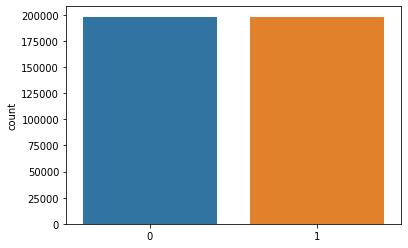

In [16]:
sns.countplot(y_train_res)

### So this is the training set we will use to build our model

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84989
           1       0.05      0.91      0.10       129

    accuracy                           0.97     85118
   macro avg       0.53      0.94      0.54     85118
weighted avg       1.00      0.97      0.99     85118



In [18]:
pred_train = lr1.predict(X_train)

In [20]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    198264
           1       0.06      0.92      0.11       344

    accuracy                           0.97    198608
   macro avg       0.53      0.95      0.55    198608
weighted avg       1.00      0.97      0.99    198608



## Both Train and Test accuracy = 97% so this is a good fitting model!


### Same data using ensemble learning

In [22]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()

### And finally using ANN

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor

from keras.utils import np_utils

In [31]:
X_train_res.shape

(396528, 28)

In [32]:
def design_mlp():
    model = Sequential()
    model.add(Dense(150,input_shape =(None,396528, 28),activation="relu"))
    model.add(Dense(200,activation="tanh"))
    model.add(Dense(100,activation="tanh"))
    model.add(Dense(1000,activation="tanh"))
    model.add(Dense(1,activation="relu"))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mean_squared_error'])
    return model

In [33]:
model = design_mlp()
model.fit(X_train_res, y_train_res.ravel(),epochs=5, batch_size=100)

Epoch 1/5


3966/3966 [==============================] - 21s 4ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 2/5
3966/3966 [==============================] - 15s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
3966/3966 [==============================] - 14s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
3966/3966 [==============================] - 14s 4ms/step - loss: 8.5658e-04 - mean_squared_error: 8.5658e-04
Epoch 5/5
3966/3966 [==============================] - 16s 4ms/step - loss: 8.1917e-04 - mean_squared_error: 8.1917e-04


In [34]:
def design_mlp():
    model1 = Sequential()
    model1.add(Dense(512,input_shape =(None,396528, 28),activation="relu"))
    model1.add(Dense(1,activation="relu"))
    model1.compile(loss="mean_squared_error",optimizer="adam",metrics=['mean_squared_error'])
    return model1

In [39]:
model1 = design_mlp()
model1.fit(X_train_res, y_train_res.ravel(),epochs=5, batch_size=100)

Epoch 1/5


3966/3966 [==============================] - 19s 5ms/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 2/5
3966/3966 [==============================] - 14s 3ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 3/5
3966/3966 [==============================] - 11s 3ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
3966/3966 [==============================] - 12s 3ms/step - loss: 8.6216e-04 - mean_squared_error: 8.6216e-04
Epoch 5/5
3966/3966 [==============================] - 14s 3ms/step - loss: 6.8064e-04 - mean_squared_error: 6.8064e-04


In [40]:
eval_score_test = model1.evaluate(X_test,y_test,verbose=1)
accuracy=(1-eval_score_test[1])*100
accuracy

2660/2660 [==============================] - 7s 2ms/step - loss: 8.5256e-04 - mean_squared_error: 8.5256e-04


99.91474427515641

In [ ]:
eval_score_test = model1.evaluate(X_train,y_test,verbose=1)
accuracy=(1-eval_score_test[1])*100
accuracy

A simple logistic regression model appears to give great accuracy after just oversampling.  
But what if we used the sample as it was given?

What if we tried undersampling instead? ( Turns out this is not the ideal imbalance situation for undersampling, but it's worth looking at the comparison for learning purposes :])


## Build model on undersampled data (NearMiss)

In [23]:
print(f"Before OverSampling, training counts of label '0': {sum(y_train == 0)} \n for label '1': {sum(y_train == 1)}")

Before OverSampling, training counts of label '0': 198264 
 for label '1': 344


In [23]:
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

print(f'After UnderSampling, the shape of train_X: {X_train_miss.shape} and the shape of train_y: {y_train_miss.shape}\n')
print(f"After UnderSampling, counts of label '0': {sum(y_train_miss == 0)} and counts of label '1': {sum(y_train_miss == 1)}")


After UnderSampling, the shape of train_X: (688, 28) and the shape of train_y: (688,)

After UnderSampling, counts of label '0': 344 and counts of label '1': 344


### This is the new, much smaller(!) training set we will use and run the same logReg model.

In [24]:
# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.65      0.79     84989
           1       0.00      0.88      0.01       129

    accuracy                           0.65     85118
   macro avg       0.50      0.77      0.40     85118
weighted avg       1.00      0.65      0.79     85118



In [27]:
pred_train = lr2.predict(X_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79    198264
           1       0.00      0.94      0.01       344

    accuracy                           0.65    198608
   macro avg       0.50      0.80      0.40    198608
weighted avg       1.00      0.65      0.79    198608



### Undersampled data and ensemble learning

In [26]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()

### Undersampled data and ANN

In [37]:
model1.fit(X_train_miss, y_train_miss.ravel(),epochs=5, batch_size=10)

Epoch 1/5
69/69 [==============================] - 0s 6ms/step - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 2/5
69/69 [==============================] - 0s 5ms/step - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 3/5
69/69 [==============================] - 0s 6ms/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 4/5
69/69 [==============================] - 0s 4ms/step - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 5/5
69/69 [==============================] - 0s 5ms/step - loss: 0.0257 - mean_squared_error: 0.0257


In [38]:
# Evaluating the model on test data  
eval_score_test = model1.evaluate(X_test,y_test,verbose=1)
accuracy=(1-eval_score_test[1])*100
accuracy

2660/2660 [==============================] - 7s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024


99.763168906793

## The acurracy for our logReg model is much lower with undersampling! Using ANN it is just minutely less accurate than oversampling!  That's pretty interesting...
Next let's try with the raw data.

## Build model on imbalanced data


# Features

There are 28 features (removing time & amount), first apply PCA.  We will set n = 3 because 3 is a good number 😃

The dataset appears to have already been standardized, so we can skip that step.

In [30]:
from sklearn.decomposition import PCA

pca_df=PCA(n_components=3)
pca_df.fit(df)
x=pca_df.transform(df)

### Our dataset has been reduced to 3 features now!

In [31]:
x.shape

(283726, 3)

### We can visualize the data with scatterplots. First in 2D using only 2 of our 3 features:

Text(0, 0.5, 'pc2')

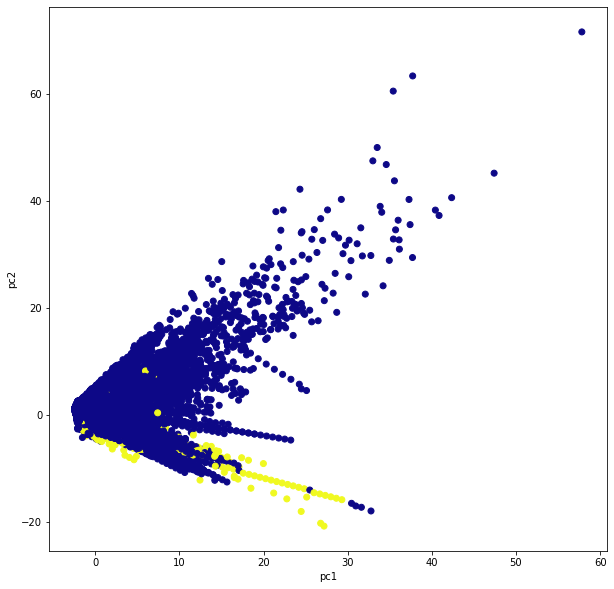

In [32]:

plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=data['Class'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

#### Then in 3D:

Text(0.5, 0, 'PC3')

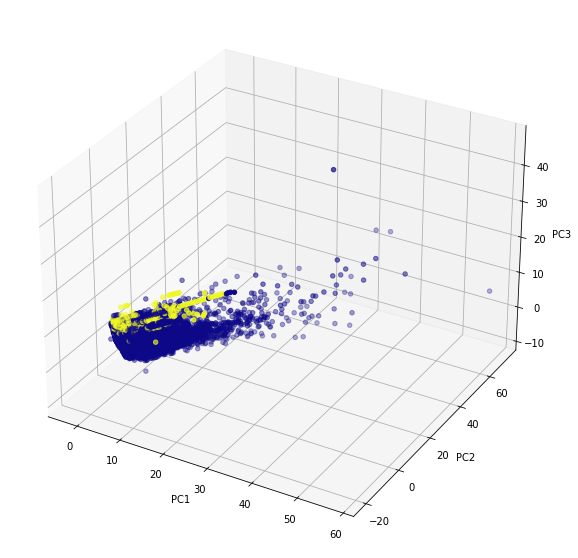

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=data['Class'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

#### We can see both our issue with imbalance and outliers through these visuals.  But in the name of science, we will continue with this version of the dataset...

Comparing the 'explained variance ratio' we will come to know which of our 3 varibles accounts for the most variance in our data (aka is the most important 😉)

In [35]:
# check how much variance is explained by each principal component
print(f'feature 1 accounts for {(pca_df.explained_variance_ratio_[0])*100:.2f}% of our variance\nfeature 2 accounts for {(pca_df.explained_variance_ratio_[1])*100:.2f}%\nfeature 3 accounts for {(pca_df.explained_variance_ratio_[2])*100:.2f}%')
print(pca_df.explained_variance_ratio_)

feature 1 accounts for 12.46% of our variance
feature 2 accounts for 8.90%
feature 3 accounts for 7.47%
[0.12456899 0.0889946  0.07472151]


#### Let's try the same logReg as before, then try all 3 versions of the data using max voting and averaging. 

In [36]:
# split data
X = df.iloc[:, df.columns != 3]
y = df.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
# describe info about train and test set
print(f'Number transactions X_train dataset: {X_train.shape[0]},Number transactions y_train dataset:　{ｙ_train.shape[0]}\nNumber transactions X_test dataset: {X_test.shape[0]},Number transactions y_test dataset:　{ｙ_test.shape[0]}')


Number transactions X_train dataset: 198608,Number transactions y_train dataset:　198608
Number transactions X_test dataset: 85118,Number transactions y_test dataset:　85118


In [38]:
# train the model on train set
lr3 = LinearRegression()
lr3.fit(X_train, y_train)
predictions = lr3.predict(X_test)

MSE= mean_squared_error(y_test, predictions)
accuracy=(1-mean_squared_error(y_test, predictions))*100
print(f'MSE: {MSE}\nAccuracy(%): {accuracy}')

MSE: 1.7440271078147333e-30
Accuracy(%): 100.0


So using the raw data causes an issue of overfitting.  *** note: we had to switch to a linear model because our output variable (y) became continuous oncce we applied PCA.

In [39]:
# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = XGBRegressor()
model_3 = RandomForestRegressor()

In [40]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

In [ ]:
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
pred_final

In [ ]:
# done with averaging
MSE= mean_squared_error(y_test, pred_final)
accuracy=(1-mean_squared_error(y_test, pred_final))*100
print(f'MSE: {MSE}\nAccuracy(%): {accuracy}')

In [ ]:
# Making the final model using voting Regressor
final_model = VotingRegressor(estimators=[('lr', model_1), ('xgb', model_2)])

In [ ]:
final_model.fit(X_train, y_train)
pred_final = final_model.predict(X_test)
MSE= mean_squared_error(y_test, pred_final)
accuracy=(1-mean_squared_error(y_test, pred_final))*100
print(f'MSE: {MSE}\nAccuracy(%): {accuracy}')

Create DF (and visuals) comparing accuracy of each model/dataset combo...

Here are some cool visuals for outlier detection!
https://towardsdatascience.com/multi-variate-outlier-detection-in-python-e900a338da10

PCA is sensitive to outlier, so try addressing them and applying PCA again.
Also try the (instructed) combo of oversampling -> outliers -> then PCA

## Efficiency!!

#### Convinced there had to be a better more efficient way to handle outliers when there are many columns, I did some research!  I found a <a href='https://towardsdatascience.com/automated-data-cleaning-with-python-94d44d854423'>module</a> created by someone affiliated with MIT that automates the cleaning process. I will try cleaning our data with it now:

In [45]:
!pip install loguru

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 3.0 MB/s eta 0:00:00


In [50]:
pip install py-AutoClean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for py-AutoClean: filename=py_AutoClean-1.1.3-py3-none-any.whl size=10287 sha256=4d361335ef2f4d1fe3686e583808e175d0447b6c93612aa6e0538c5c36b15b3a
  Stored in directory: /root/.cache/pip/wheels/ec/69/58/cebe3f3e7e78242900e9547a70801cb6ecc4f8e11872a0b71e
Successfully built py-AutoClean


In [ ]:
plt.hist(df)

In [51]:
#
#pipeline = AutoClean(df)

#pipeline.output

KeyboardInterrupt: ignored

In [ ]:
pipeline = AutoClean(df, mode='manual', outliers='auto', verbose=True)

In [57]:
pipeline.output

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-4.263980,2.901188,-3.764645,-2.066656,-2.642901,-2.517765,-2.236984,1.127502,1.914428,1.937414,...,0.650222,0.213454,0.111864,0.611926,-0.509348,1.352896,0.250034,0.333982,0.274917,0
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
283723,1.919565,-0.301254,-3.249640,-0.557828,2.565290,2.145527,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [58]:
new_df=pd.DataFrame(pipeline.output)

In [ ]:
plt.figure(figsize=(15,15))
plt.title('After Winsorization')
plt.boxplot(new_df)

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Before Winsorization')
plt.boxplot(df)

### That took about 2 hours, but I think it was worth it!

First I tried running the entire AutoCleaner but after 23 minutes I cancelled it because...I had 'verbose' set to false and couldn't tell what was happening or guage how long it would take.  
I did more research and found in the documentation that you can customize the cleaning process.  Select which tasks you want to do, what methods you want to use to achieve them, and also set 'verbose' to True in order to see the steps as they are processed.

I quickly made comparison boxplots to confirm and display the changes.

In [66]:
new_pca_df=PCA(n_components=3)
new_pca_df.fit(df)
x=new_pca_df.transform(df)

Text(0, 0.5, 'pc2')

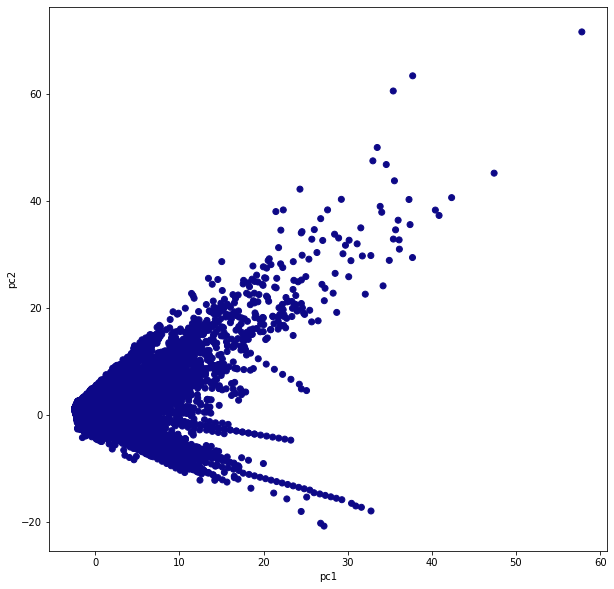

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=new_df['Class'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

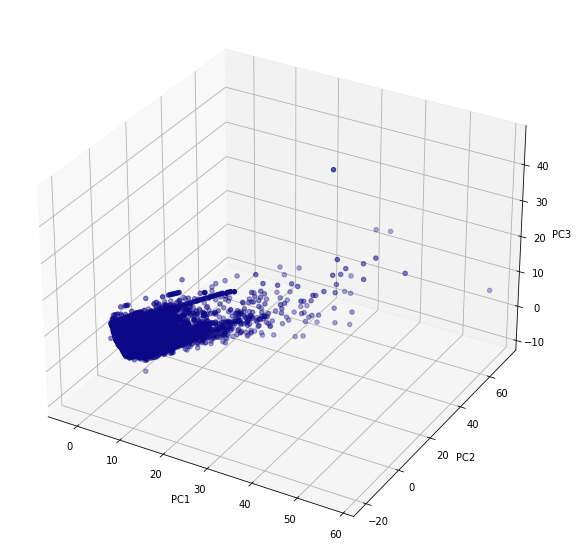

In [71]:
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=new_df['Class'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [72]:
new_df.Class.value_counts()

0    283726
Name: Class, dtype: Int64

## OH NO!!!! 
#### It looks like something went wrong! I think (99.88% sure) it treated the Class values of 1 as outliers as a result of the imbalanced data!

Options for correcting this:
- run again, removing 'Class' first
- oversample (again) then run on entire dataset

In [42]:
x = df.loc[:, df.columns != 'Class']
y = df['Class']
x_smote, y_smote= sm.fit_resample(x, y.ravel())

<AxesSubplot:ylabel='count'>

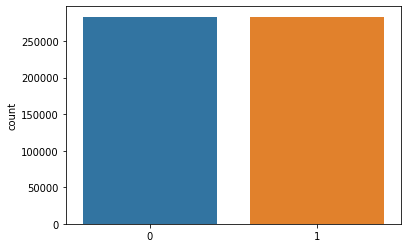

In [80]:
sns.countplot(y_smote)

In [48]:
smoted= pd.DataFrame([x_smote,y_smote],axis=1)

TypeError: ignored

In [44]:
smoted.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053


In [45]:
smoted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566506 entries, 0 to 1
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      566506 non-null  float64
 1   V2      566506 non-null  float64
 2   V3      566506 non-null  float64
 3   V4      566506 non-null  float64
 4   V5      566506 non-null  float64
 5   V6      566506 non-null  float64
 6   V7      566506 non-null  float64
 7   V8      566506 non-null  float64
 8   V9      566506 non-null  float64
 9   V10     566506 non-null  float64
 10  V11     566506 non-null  float64
 11  V12     566506 non-null  float64
 12  V13     566506 non-null  float64
 13  V14     566506 non-null  float64
 14  V15     566506 non-null  float64
 15  V16     566506 non-null  float64
 16  V17     566506 non-null  float64
 17  V18     566506 non-null  float64
 18  V19     566506 non-null  float64
 19  V20     566506 non-null  float64
 20  V21     566506 non-null  float64
 21  V22     566506 

In [46]:
y_smote

array([0, 0, 0, ..., 1, 1, 1])

In [47]:
x_smote

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,-2.309800,0.654704,1.215510,2.514091,0.183226,0.461133,1.657008,-1.900380,-0.049457,2.451719,...,0.646378,-0.570301,0.497543,0.436078,0.215210,0.290096,-0.418580,-0.068310,-1.944992,0.222276
566502,1.852929,1.358281,-1.973686,4.142675,1.234610,-0.735832,0.567448,-0.126001,-1.543427,0.216521,...,-1.591460,-0.171529,-0.298237,-0.812856,0.200240,-0.270445,-0.101868,-0.234824,-0.006181,0.018212
566503,0.794044,0.664004,-0.229694,1.130045,0.568131,-0.169731,0.167776,0.069929,-0.104730,-0.552288,...,-0.469891,-0.137904,-0.019778,-0.011985,-0.188105,-0.792652,0.566543,-0.200520,0.014954,0.032400
566504,-23.032101,13.402657,-25.022920,6.252840,-17.211425,-4.523546,-17.012126,15.246944,-3.853396,-8.532917,...,1.033292,1.627911,1.768565,-1.674789,-1.031286,0.142045,1.595678,-0.221742,1.488303,0.440492


In [49]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn import datasets

In [ ]:
# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train_res, X_test, y_train_res, y_test)

 38%|███▊      | 11/29 [15:44<22:46, 75.92s/it]

In [ ]:
df=df.sample(n=20000)